In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resto = pd.read_csv('Top250.csv')

# Data Preparation
Quick look at the data, and its data types and the null values present 

Display first 5 values 

In [3]:
resto.head()

Rank   Restaurant                                            Content  \
0     1   McDonald's                                                NaN   
1     2    Starbucks                                                NaN   
2     3  Chick-fil-A  While Popeyes got a lot of the chicken buzz in...   
3     4    Taco Bell                                                NaN   
4     5  Burger King                                                NaN   

   Sales YOY_Sales  Units YOY_Units Headquarters             Segment_Category  
0  40412      4.9%  13846     -0.5%          NaN       Quick Service & Burger  
1  21380      8.6%  15049      3.0%          NaN  Quick Service & Coffee Cafe  
2  11320     13.0%   2470      5.0%          NaN      Quick Service & Chicken  
3  11293      9.0%   6766      2.7%          NaN      Quick Service & Mexican  
4  10204      2.7%   7346      0.2%          NaN       Quick Service & Burger

Display data for each column

In [4]:
resto.dtypes

Rank                 int64
Restaurant          object
Content             object
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Headquarters        object
Segment_Category    object
dtype: object

Check for null values

In [5]:
resto.isnull()

Rank  Restaurant  Content  Sales  YOY_Sales  Units  YOY_Units  \
0    False       False     True  False      False  False      False   
1    False       False     True  False      False  False      False   
2    False       False    False  False      False  False      False   
3    False       False     True  False      False  False      False   
4    False       False     True  False      False  False      False   
..     ...         ...      ...    ...        ...    ...        ...   
245  False       False     True  False      False  False      False   
246  False       False     True  False      False  False      False   
247  False       False     True  False      False  False      False   
248  False       False     True  False      False  False      False   
249  False       False     True  False      False  False      False   

     Headquarters  Segment_Category  
0            True             False  
1            True             False  
2            True             False  
3            True             False  
4            True             False  
..            ...               ...  
245          True             False  
246          True             False  
247          True             False  
248          True             False  
249          True             False  

[250 rows x 9 columns]

# Data Cleaning
Remove columns with null values and convert data to its correct type

Remove columns content and headquarters since it contains null values

In [6]:
resto_cleaned = resto.drop(['Content', 'Headquarters'], axis=1)

Remove percentage symbol 

In [7]:
resto_cleaned['YOY_Sales'] = list(map(lambda x : x[:-1], resto_cleaned['YOY_Sales']))
resto_cleaned['YOY_Units'] = list(map(lambda x : x[:-1], resto_cleaned['YOY_Units']))

Convert YOY_Sales and YOY_Units to float

In [8]:
resto_cleaned['YOY_Sales'] = list(map(float, resto_cleaned['YOY_Sales']))
resto_cleaned['YOY_Units'] = list(map(float, resto_cleaned['YOY_Units']))

Rename columns to clarify that the numbers are in percentage

In [9]:
resto_cleaned = resto_cleaned.rename(columns={'YOY_Sales': 'YOY_Sales in (%)', 'YOY_Units': 'YOY_Units in (%)'})

In [10]:
resto_cleaned.head()

Rank   Restaurant  Sales  YOY_Sales in (%)  Units  YOY_Units in (%)  \
0     1   McDonald's  40412               4.9  13846              -0.5   
1     2    Starbucks  21380               8.6  15049               3.0   
2     3  Chick-fil-A  11320              13.0   2470               5.0   
3     4    Taco Bell  11293               9.0   6766               2.7   
4     5  Burger King  10204               2.7   7346               0.2   

              Segment_Category  
0       Quick Service & Burger  
1  Quick Service & Coffee Cafe  
2      Quick Service & Chicken  
3      Quick Service & Mexican  
4       Quick Service & Burger

# Data Analysis

## Statistics

Basic statistical analysis for quantitative data

### Observation


In [11]:
resto_cleaned[['Sales', 'Units']].describe()

Sales         Units
count    250.00000    250.000000
mean    1242.74000    850.076000
std     3365.22882   2296.151659
min      126.00000     13.000000
25%      181.00000     85.000000
50%      330.00000    207.000000
75%      724.75000    555.250000
max    40412.00000  23801.000000

In [12]:
resto_cleaned[['YOY_Sales in (%)', 'YOY_Units in (%)']].describe()

YOY_Sales in (%)  YOY_Units in (%)
count        250.000000        250.000000
mean           2.938400          1.219200
std            8.953784          7.936431
min          -21.200000        -32.800000
25%           -2.375000         -2.025000
50%            2.200000          0.000000
75%            6.575000          3.475000
max           39.500000         38.500000

In [13]:
count_per_segment = { "Segment_Category":[], "Count":[] }

In [37]:
for index, value in resto_cleaned["Segment_Category"].value_counts().items():
    count_per_segment["Segment_Category"].append(index)
    count_per_segment["Count"].append(value)
counts_df = pd.DataFrame(count_per_segment, columns=["Segment_Category", "Count"])
counts_df.head(10)
# counts["Count"].values

Segment_Category  Count
0                  Varied Menu     22
1                      Mexican     14
2       Quick Service & Burger     13
3                 Family Style     10
4                Italian/Pizza     10
5                       Burger     10
6  Casual Dining & Varied Menu      9
7                        Pizza      9
8                        Steak      9
9        Quick Service & Pizza      8

Showing top 10 segment categories with highest frequency

In [16]:
# resto_cleaned.groupby('Segment_Category').count()
seg_count = resto_cleaned['Segment_Category'].value_counts().head(10)
seg_count.to_frame()

Segment_Category
Varied Menu                                22
Mexican                                    14
Quick Service & Burger                     13
Family Style                               10
Italian/Pizza                              10
Burger                                     10
Casual Dining & Varied Menu                 9
Pizza                                       9
Steak                                       9
Quick Service & Pizza                       8

Text(0.5, 0, 'Frequency Count')

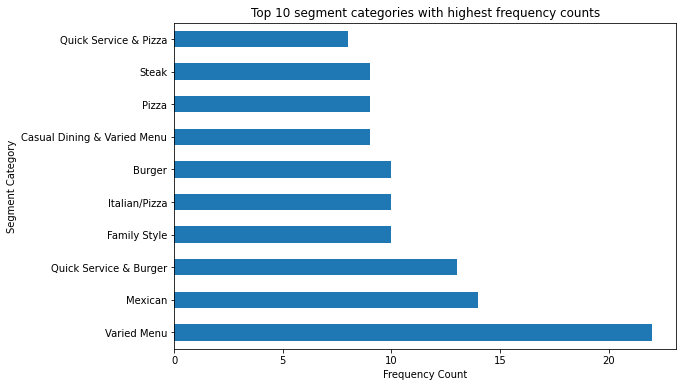

In [17]:
ax = seg_count.plot.barh(figsize=(9,6), x="Segment_Category")
ax.set_title("Top 10 segment categories with highest frequency counts")
ax.set_ylabel("Segment Category")
ax.set_xlabel("Frequency Count")

## Observation
Most restaurants in dataset falls under the segment category of varied menu 

In [18]:
sales_by_segment_categ = resto_cleaned.groupby('Segment_Category')["Sales"].sum().to_frame().sort_values(by="Sales", ascending=False)
sales_by_segment_categ.head(10) 

Sales
Segment_Category                   
Quick Service & Burger        79384
Quick Service & Coffee Cafe   31889
Quick Service & Chicken       22619
Quick Service & Pizza         21316
Casual Dining & Varied Menu   15686
Quick Service & Sandwich      14965
Quick Service & Mexican       12143
Family Dining & Family Style  11677
Casual Dining & Steak          8014
Fast Casual & Mexican          7159

Text(0.5, 0, 'Sales')

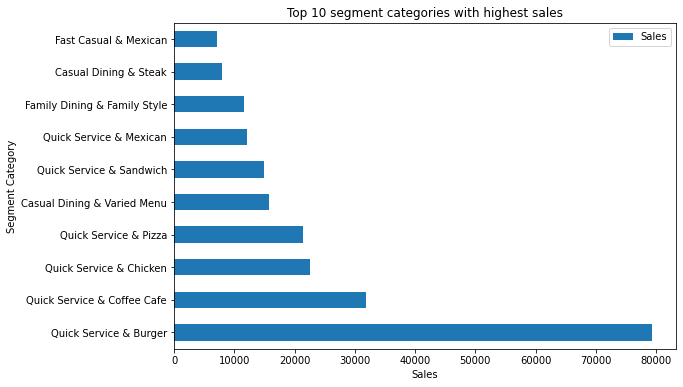

In [19]:
viz_sales = sales_by_segment_categ.head(10).reset_index()
ax = viz_sales.plot.barh(figsize=(9,6), x="Segment_Category", y="Sales")
ax.set_title("Top 10 segment categories with highest sales")
ax.set_ylabel("Segment Category")
ax.set_xlabel("Sales")

Split Segment_Category into category and add column Category

In [20]:
split_categ = resto_cleaned['Segment_Category'].str.split("&", n = -1, expand = True)
resto_cleaned['Category'] = split_categ[0]

In [21]:
sales_by_categ = resto_cleaned.groupby('Category')["Sales"].sum().to_frame().sort_values(by='Sales', ascending=False)
sales_by_categ.head(10)

Sales
Category              
Quick Service   192513
Casual Dining    38689
Fast Casual      32699
Family Dining    11677
Varied Menu       4610
Mexican           3396
Steak             2989
Pizza             2585
Family Style      2292
Burger            2187

Text(0.5, 0, 'Sales')

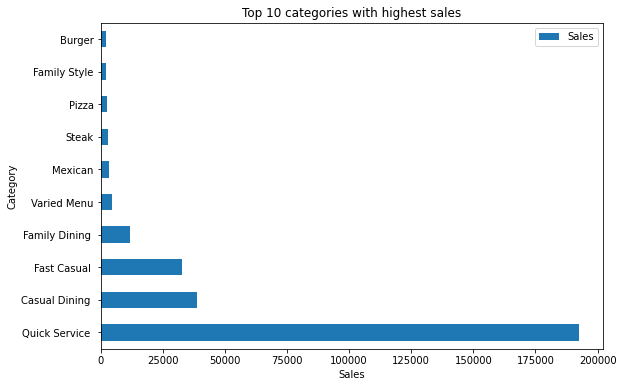

In [22]:
viz_sales_categ = sales_by_categ.head(10).reset_index()
ax = viz_sales_categ.plot.barh(figsize=(9,6), x="Category", y="Sales")
ax.set_title("Top 10 categories with highest sales")
ax.set_ylabel("Category")
ax.set_xlabel("Sales")

In [23]:
units_categ = resto_cleaned.groupby('Segment_Category')["Units"].sum().to_frame().sort_values(by='Units', ascending=False) 
units_categ.head(10)

Units
Segment_Category                      
Quick Service & Burger           39172
Quick Service & Sandwich         28171
Quick Service & Coffee Cafe      25763
Quick Service & Pizza            24027
Quick Service & Chicken          11271
Quick Service & Mexican           7362
Family Dining & Family Style      7047
Quick Service & Frozen Desserts   6905
Fast Casual & Sandwich            6414
Casual Dining & Varied Menu       4967

Text(0.5, 0, 'Units')

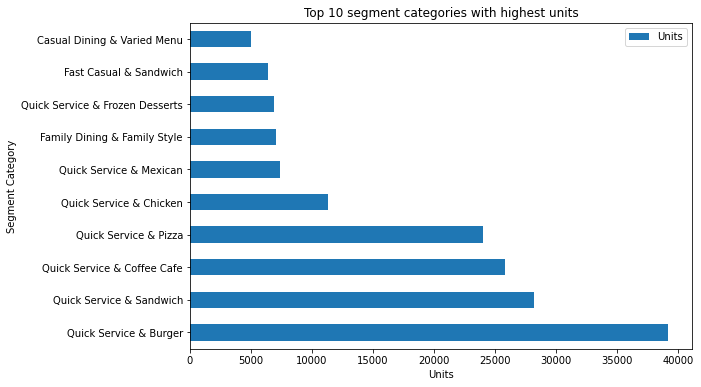

In [24]:
viz_units_categ = units_categ.head(10).reset_index()
ax = viz_units_categ.plot.barh(figsize=(9,6), x="Segment_Category", y="Units")
ax.set_title("Top 10 segment categories with highest units")
ax.set_ylabel("Segment Category")
ax.set_xlabel("Units")

Text(0.5, 1.0, 'Correlation between total units and sales (excluding the top 5 total units)')

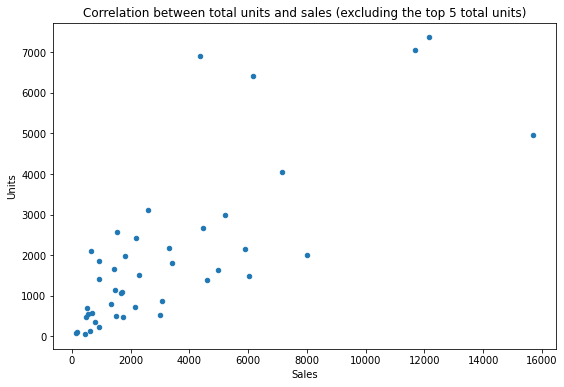

In [25]:
units_sales = units_categ.join(sales_by_segment_categ)
units_sales.reset_index()
sales_correl = units_sales[5:].plot(kind="scatter", x='Sales', y='Units', figsize=(9,6))
sales_correl.set_title("Correlation between total units and sales (excluding the top 5 total units)")

In [26]:
yoy_sales_segment_categ = resto_cleaned.groupby('Segment_Category')["YOY_Sales in (%)"].sum().to_frame().sort_values(by="YOY_Sales in (%)", ascending=False)
yoy_sales_segment_categ.head(10) 

YOY_Sales in (%)
Segment_Category                          
Fast Casual & Burger                  66.6
Steak                                 60.3
Mexican                               58.1
Chicken                               52.6
Fast Casual & Chicken                 38.9
Fast Casual & Sandwich                38.0
Sports Bar                            35.3
Quick Service & Chicken               34.3
Quick Service & Beverage              33.8
Pizza                                 31.6

Text(0.5, 0, 'YOY Sales in %')

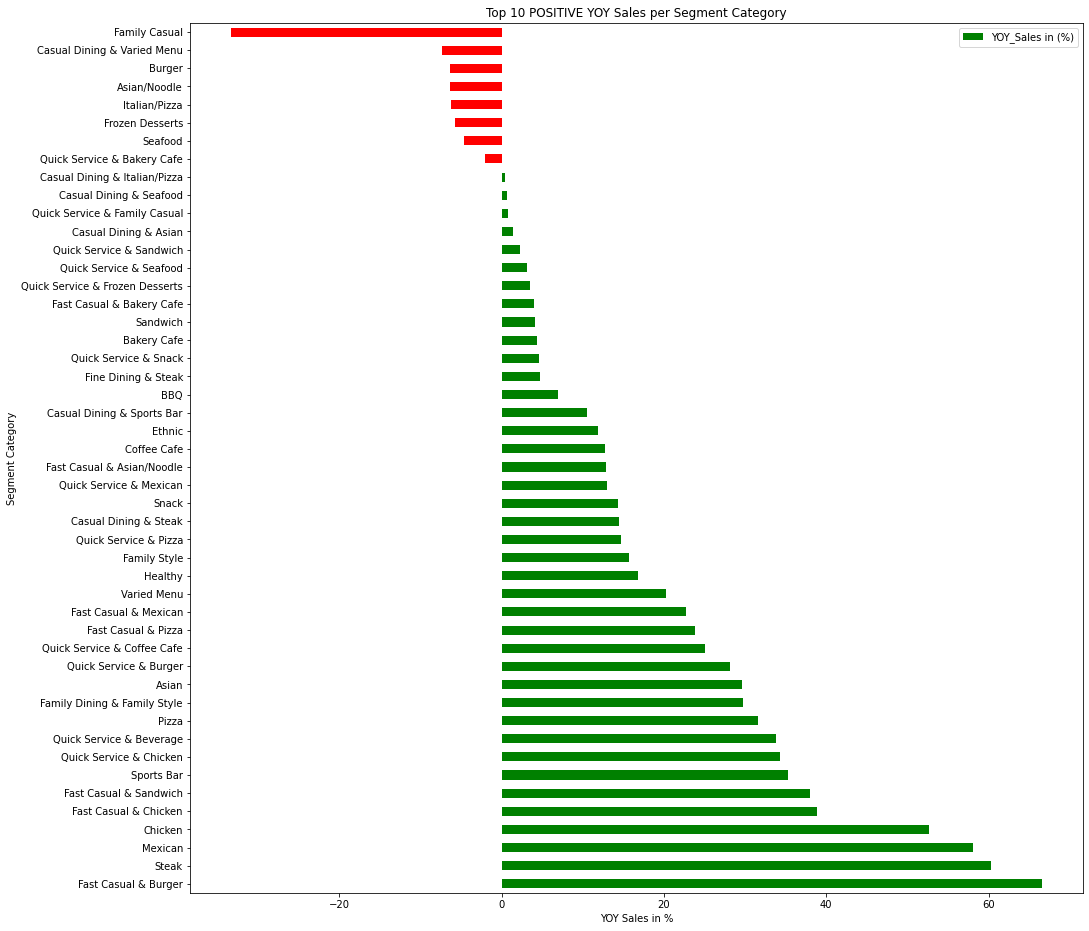

In [27]:
# yoy_sales_segment_categ.reset_index()
yoy_sales_segment_categ['positive'] = yoy_sales_segment_categ > 0
viz_yoy_sales_segment = yoy_sales_segment_categ.reset_index()
ax = viz_yoy_sales_segment.plot.barh(figsize=(16,16), x="Segment_Category", y="YOY_Sales in (%)", color=yoy_sales_segment_categ['positive'].map({True:'g', False:'r'}))
ax.set_title("Top 10 POSITIVE YOY Sales per Segment Category")
ax.set_ylabel("Segment Category")
ax.set_xlabel("YOY Sales in %")

Text(0.5, 1.0, 'Correlation between yoy sales and total sales')

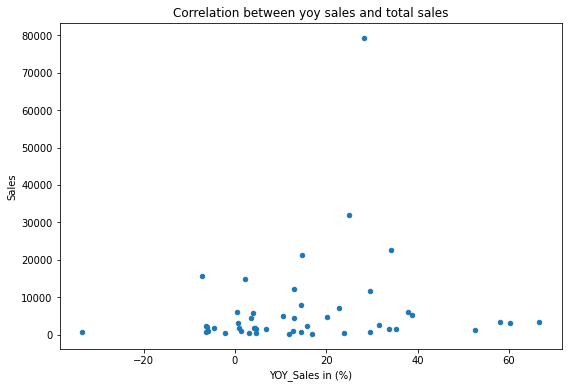

In [28]:
yoy_sales = yoy_sales_segment_categ.join(sales_by_segment_categ)
yoy_sales.reset_index()
sales_correl = yoy_sales.plot(kind="scatter", x='YOY_Sales in (%)', y='Sales', figsize=(9,6))
sales_correl.set_title("Correlation between yoy sales and total sales")

In [29]:
top_resto = resto_cleaned.groupby("Restaurant")["Sales"].sum().to_frame().sort_values('Sales', ascending=False)
top_resto.head(10)

Sales
Restaurant         
McDonald's    40412
Starbucks     21380
Chick-fil-A   11320
Taco Bell     11293
Burger King   10204
Subway        10200
Wendy's        9762
Dunkin'        9228
Domino's       7044
Panera Bread   5890

Text(0.5, 0, 'Sales')

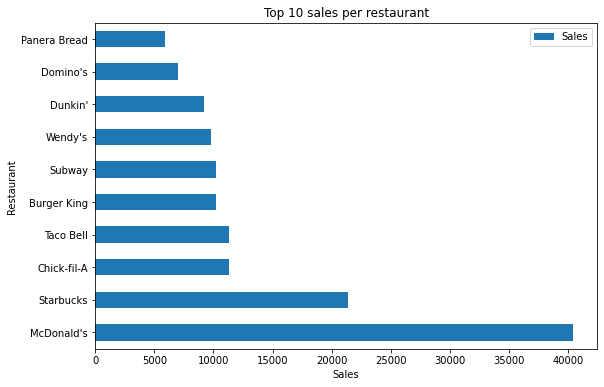

In [30]:
viz_sales_resto = top_resto.head(10).reset_index()
ax = viz_sales_resto.plot.barh(figsize=(9,6), x="Restaurant", y="Sales")
ax.set_title("Top 10 sales per restaurant")
ax.set_ylabel("Restaurant")
ax.set_xlabel("Sales")

In [31]:
yoy_sales_resto = resto_cleaned.groupby("Restaurant")["YOY_Sales in (%)"].sum().to_frame().sort_values('YOY_Sales in (%)', ascending=False)
yoy_sales_resto

YOY_Sales in (%)
Restaurant                                          
Chicken Salad Chick                             39.5
Metro Diner                                     36.3
First Watch                                     35.1
Shake Shack                                     31.8
Walk-On's Sports Bistreaux                      27.8
...                                              ...
Friendly's                                     -15.3
McCormick & Schmick's                          -15.6
Fuddruckers                                    -15.8
Old Country Buffet/HomeTown Buffet             -18.8
Houlihan's                                     -21.2

[250 rows x 1 columns]

Text(0.5, 0, 'YOY Sales in %')

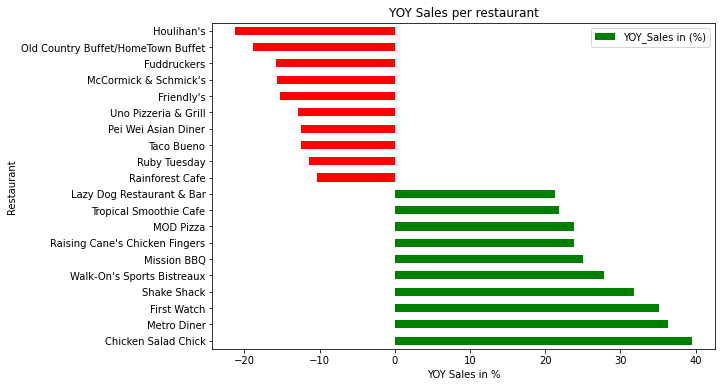

In [32]:
yoy_positive = yoy_sales_resto.head(10)
yoy_negative = yoy_sales_resto.tail(10)
top_pos_neg = yoy_positive.append(yoy_negative)
top_pos_neg.reset_index()
top_pos_neg['positive'] = top_pos_neg > 0
viz_yoy_resto = top_pos_neg.reset_index()
ax = viz_yoy_resto.plot.barh(figsize=(9,6), x="Restaurant", y="YOY_Sales in (%)", color=top_pos_neg['positive'].map({True:'g', False:'r'}))
ax.set_title("YOY Sales per restaurant")
ax.set_ylabel("Restaurant")
ax.set_xlabel("YOY Sales in %")

In [33]:
resto_units = resto_cleaned.groupby("Restaurant")["Units"].sum().to_frame().sort_values('Units', ascending=False)
resto_units.head(10)

Units
Restaurant        
Subway       23801
Starbucks    15049
McDonald's   13846
Dunkin'       9630
Burger King   7346
Pizza Hut     7306
Taco Bell     6766
Domino's      6126
Wendy's       5852
Dairy Queen   4381

Text(0.5, 0, 'Units')

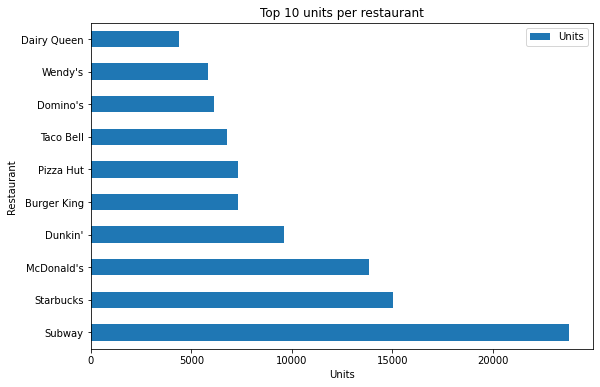

In [34]:
resto_units.reset_index()
viz_resto_units = resto_units.head(10).reset_index()
ax = viz_resto_units.plot.barh(figsize=(9,6), x="Restaurant", y="Units")
ax.set_title("Top 10 units per restaurant")
ax.set_ylabel("Restaurant")
ax.set_xlabel("Units")

Text(0.5, 1.0, 'Correlation between total sales and total units per restaurant (excluding top 50)')

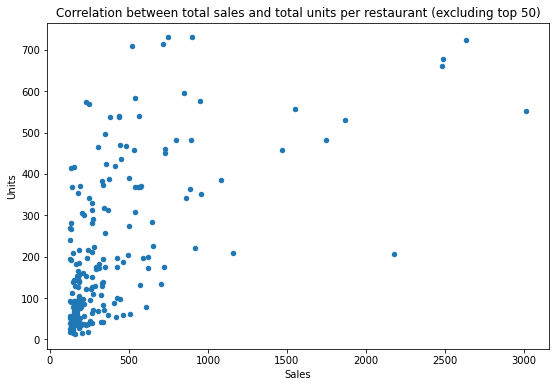

In [35]:
resto_sales_units = resto_units.join(top_resto)
resto_sales_units.reset_index()
resto_corell = resto_sales_units[50:].plot(kind="scatter", x='Sales', y='Units', figsize=(9,6))
resto_corell.set_title("Correlation between total sales and total units per restaurant (excluding top 50)")